Привет, меня зовут Аблаев Люман. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Полезные ссылки:</font>
* Могу предложить обратить внимание на вот этот курс: https://vk.com/dlschool_mipt

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Большое спасибо за проделанную работу.
* Работа не закончена, но думаю ты легко это поправишь.
- Жду твой законченный проект 


<div class="alert alert-block alert-info">
<b>Комментарий студента :</b> Учел все замечания. Еще поменял модель (старая в самом конце в разделе Черновики). И спасибо большое за ссылку на физтеховский источник!

<div class="alert alert-block alert-success">
<b>Ревьювер[2]:</b> Отлично, теперь все корректно. Новая модель, показала неплохие результаты, молодец, что не стесняешься экспеременитовать это очень важно в нашей специальности, особенно при работе с нейронками. Рад был быть полезен, удачи в дальнейшем обучении!
</div>


# Определение возраста покупателей

<div class="alert alert-block alert-info">
<b>Совет :</b> Не забывай про описание проекта

**Описание задачи**  
Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.  
Задача: построить модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.  

**Данные**  
Для обучения используется датасет APPA-REAL

## Исследовательский анализ данных

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
data = pd.read_csv('/datasets/faces/labels.csv')

train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=data,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [4]:
# Посмотрим на описание данных
data.real_age.describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

В данных содержится 7591 изображение. Этого вполне достаточно для обучения глубокой нейронной сети.  
Средний возраст в выборке составляет 31 год. Всего представлены лица людей возрастом от одного до ста лет.

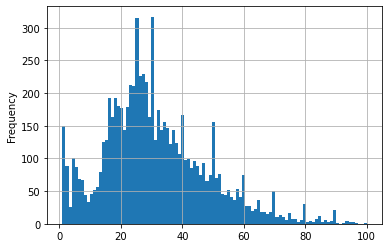

In [11]:
# Посмотрим на распределение возраста в датасете
data.real_age.plot.hist(grid=True, bins=100);

Форма распределения напоминает нормальное.  
На графике видны пики в области таких вохрастов как 1 год, 4 года, 16 и 18 лет, 25 лет, 30 лет, 40 лет, 50 лет, 60 лет, 70 лет, 80 лет и 90 лет. Возможно, причиной таких пиков является способ сбора данных. Если часть фотографий была взята из сети, то этим, возможно отчасти можно объяснить такие пики. Наверняка в сети проще найти фотографии людей с "круглым" возрастом, которые они могли выклдаывать к примеру, на свой юбилей, нежели найти фотографии людей возраста "промежуточного".



<div class="alert alert-block alert-info">
<b>Совет:</b> Используется не лучшее количество корзин, попробуй 100. Такое количество позволяют увидеть все основные особенности: пики, выбросы, вид распределения. Важно обратить внимание на пики и выдвинуть предположение откуда они могли появиться.
</div>



Выведем часть датасета на экран.

In [6]:
x, y = next(train_gen_flow)

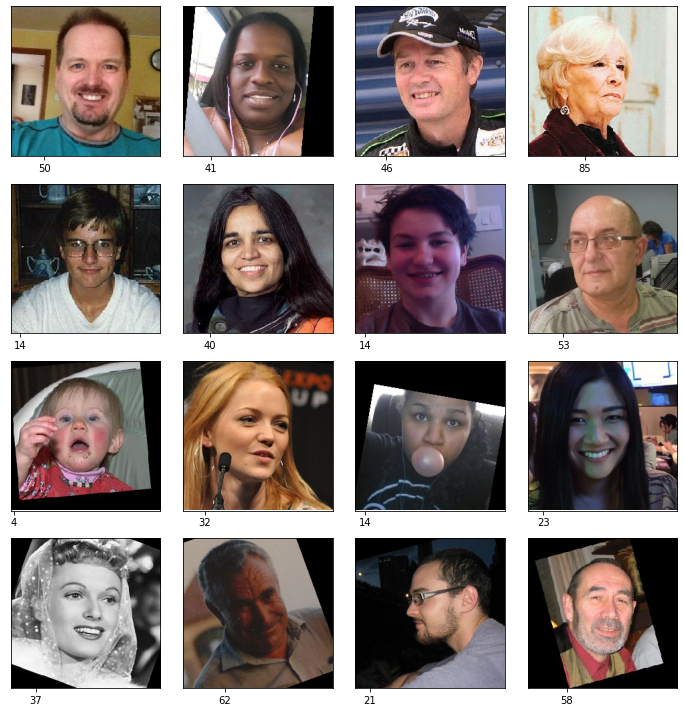

In [10]:
fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(x[i])
    plt.xticks([y[i]])
    plt.yticks([])
    plt.tight_layout()

Видно, что к датасету уже была применена аугментация. Часть фотографий повернуты под определенным углом. Также представлены фотографии различной яркости и цвета (черно-белые, цветные). На фотографиях люди находятся в разных позах и имеют различное выражение лица (смеются,  улыбаются, смотрят в сторону). На изображениях представлены люди как в анфас, так и в профиль. На фотографиях присутсвтуют посторонние объекты (очки, микрофон, фата, ремень безопасности, наушники и тд). Люди, которые изображены на фото являются представителями различных рас, национальностей и пола. Также важно отметить что площадь, которую занимает лицо на фотографии отличается от изображения к изображению.

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что фотографии выведены в несколько рядов (сверху можно еще указать возраст). 
</div>


<div class="alert alert-danger">
<b>Ошибка</b>

По результатам анализа датасета, гистограммы и фото необходимы выводы:

1 Пояснения по размеру выборки (большая, маленькая, достаточная) и предложения по работе с датасетом такого размера

2 Выводы по гистограмме. Обратить внимание на выбросы, пики в круглые даты и выдвинуть предположения почему они могли появиться.
    
3 По фото. Описать особенности увиденные на фото: цветность, качество, размер лиц, угол поворота и т.п.
    


<div class="alert alert-block alert-success">
<b>Успе[2]х:</b> Отлично, проводен подробный анализ, но не забывай структурировать текст и выделять ключевые моменты - такую информацию легче воспринимать
</div>


## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

Для обучения было принято воспользоваться моделью DEX (Deep EXpectation Network). Однако в следствии сложностей с использованием ее в тренажере яндекса (возникает ошибка: "Код работает, но выполняет не ту задачу"), было решено ограничиться использованием архитектуры VGG19, которая лежит в основе DEX.

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg19 import VGG19

def load_train(path):
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1 / 255.,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2)
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        subset='training',
        class_mode='raw',
        seed=12345)
    return train_datagen_flow


def load_test(path):
    val_datagen = ImageDataGenerator(validation_split=0.25, rescale=1 / 255.)
    val_datagen_flow = val_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        subset='validation',
        class_mode='raw',
        seed=12345)
    return val_datagen_flow


def create_model(input_shape):
    optimizer = Adam(lr=0.0001)
    model = Sequential()
    vgg = VGG19(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    model.add(vgg)
    model.add(Flatten())
    model.add(Dense(units=1, activation='relu'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=36,
                steps_per_epoch=None, validation_steps=None):
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model

```

```
Train for 178 steps, validate for 60 steps
Epoch 1/36
178/178 - 109s - loss: 372.5428 - mean_absolute_error: 14.6416 - val_loss: 173.8678 - val_mean_absolute_error: 10.4442
Epoch 2/36
178/178 - 105s - loss: 207.0761 - mean_absolute_error: 11.1029 - val_loss: 183.2644 - val_mean_absolute_error: 11.3230
Epoch 3/36
178/178 - 104s - loss: 192.0617 - mean_absolute_error: 10.6831 - val_loss: 142.0384 - val_mean_absolute_error: 9.3611
Epoch 4/36
178/178 - 107s - loss: 166.5931 - mean_absolute_error: 9.9594 - val_loss: 131.0969 - val_mean_absolute_error: 8.9428
Epoch 5/36
178/178 - 103s - loss: 153.9160 - mean_absolute_error: 9.4704 - val_loss: 133.7099 - val_mean_absolute_error: 9.3042
Epoch 6/36
178/178 - 101s - loss: 139.9830 - mean_absolute_error: 9.0576 - val_loss: 113.0357 - val_mean_absolute_error: 8.1960
Epoch 7/36
178/178 - 95s - loss: 122.3199 - mean_absolute_error: 8.4482 - val_loss: 104.7792 - val_mean_absolute_error: 8.0034
Epoch 8/36
178/178 - 95s - loss: 112.9034 - mean_absolute_error: 8.0991 - val_loss: 97.0893 - val_mean_absolute_error: 7.4349
Epoch 9/36
178/178 - 103s - loss: 105.5949 - mean_absolute_error: 7.7462 - val_loss: 108.1445 - val_mean_absolute_error: 8.3246
Epoch 10/36
178/178 - 102s - loss: 98.1929 - mean_absolute_error: 7.5450 - val_loss: 86.4554 - val_mean_absolute_error: 7.0889
Epoch 11/36
178/178 - 104s - loss: 92.5713 - mean_absolute_error: 7.3263 - val_loss: 85.2495 - val_mean_absolute_error: 6.9895
Epoch 12/36
178/178 - 97s - loss: 85.2784 - mean_absolute_error: 7.0329 - val_loss: 126.8086 - val_mean_absolute_error: 8.2993
Epoch 13/36
178/178 - 93s - loss: 84.4560 - mean_absolute_error: 7.0065 - val_loss: 84.5284 - val_mean_absolute_error: 7.0517
Epoch 14/36
178/178 - 89s - loss: 79.0576 - mean_absolute_error: 6.7468 - val_loss: 97.0444 - val_mean_absolute_error: 7.6537
Epoch 15/36
178/178 - 88s - loss: 73.5195 - mean_absolute_error: 6.5001 - val_loss: 74.9987 - val_mean_absolute_error: 6.6066
Epoch 16/36
178/178 - 88s - loss: 67.7920 - mean_absolute_error: 6.2666 - val_loss: 78.3218 - val_mean_absolute_error: 6.7665
Epoch 17/36
178/178 - 88s - loss: 66.8398 - mean_absolute_error: 6.2062 - val_loss: 90.8554 - val_mean_absolute_error: 7.2630
Epoch 18/36
178/178 - 89s - loss: 67.6451 - mean_absolute_error: 6.2019 - val_loss: 78.7614 - val_mean_absolute_error: 6.6950
Epoch 19/36
178/178 - 88s - loss: 61.0862 - mean_absolute_error: 5.9442 - val_loss: 84.6495 - val_mean_absolute_error: 7.0745
Epoch 20/36
178/178 - 88s - loss: 59.2770 - mean_absolute_error: 5.8575 - val_loss: 79.8038 - val_mean_absolute_error: 6.6701
Epoch 21/36
178/178 - 88s - loss: 53.1201 - mean_absolute_error: 5.5528 - val_loss: 83.1565 - val_mean_absolute_error: 6.6841
Epoch 22/36
178/178 - 88s - loss: 51.8153 - mean_absolute_error: 5.4691 - val_loss: 126.4826 - val_mean_absolute_error: 8.8848
Epoch 23/36
178/178 - 88s - loss: 51.2552 - mean_absolute_error: 5.4544 - val_loss: 80.4267 - val_mean_absolute_error: 6.7568
Epoch 24/36
178/178 - 88s - loss: 44.7109 - mean_absolute_error: 5.1482 - val_loss: 78.4419 - val_mean_absolute_error: 6.6989
Epoch 25/36
178/178 - 88s - loss: 48.4209 - mean_absolute_error: 5.2749 - val_loss: 75.7305 - val_mean_absolute_error: 6.5327
Epoch 26/36
178/178 - 88s - loss: 45.1232 - mean_absolute_error: 5.1457 - val_loss: 70.7587 - val_mean_absolute_error: 6.2312
Epoch 27/36
178/178 - 89s - loss: 40.0761 - mean_absolute_error: 4.8401 - val_loss: 77.6060 - val_mean_absolute_error: 6.4648
Epoch 28/36
178/178 - 88s - loss: 39.0084 - mean_absolute_error: 4.8377 - val_loss: 82.9059 - val_mean_absolute_error: 6.8240
Epoch 29/36
178/178 - 88s - loss: 36.8825 - mean_absolute_error: 4.6572 - val_loss: 76.1138 - val_mean_absolute_error: 6.4856
Epoch 30/36
178/178 - 89s - loss: 33.9109 - mean_absolute_error: 4.4973 - val_loss: 75.9446 - val_mean_absolute_error: 6.4506
Epoch 31/36
178/178 - 88s - loss: 35.5786 - mean_absolute_error: 4.5528 - val_loss: 107.5802 - val_mean_absolute_error: 8.0177
Epoch 32/36
178/178 - 89s - loss: 35.5517 - mean_absolute_error: 4.6016 - val_loss: 78.4302 - val_mean_absolute_error: 6.4441
Epoch 33/36
178/178 - 89s - loss: 30.6081 - mean_absolute_error: 4.2625 - val_loss: 71.0422 - val_mean_absolute_error: 6.2016
Epoch 34/36
178/178 - 88s - loss: 29.7097 - mean_absolute_error: 4.1643 - val_loss: 87.7391 - val_mean_absolute_error: 7.1510
Epoch 35/36
178/178 - 88s - loss: 29.2734 - mean_absolute_error: 4.1303 - val_loss: 70.5231 - val_mean_absolute_error: 6.3741
Epoch 36/36
178/178 - 89s - loss: 29.3443 - mean_absolute_error: 4.1381 - val_loss: 75.8240 - val_mean_absolute_error: 6.4699
60/60 - 9s - loss: 75.8240 - mean_absolute_error: 6.4699
Test MAE: 6.4699
```

## Анализ обученной модели

Средняя абсолютная ошибка, которую удалось получить с итоговой моделью на тестовой выборке - 6,4 года.  
Итоговая модель предстявляет собой архитектуру VGG19 без "головы", с весами, "предобученными" на датасете "ImageNet". К данной архитектуре в качестве выхода был добавлен полнойсвязный слой с одним нейроном и функцией активации ReLU. Обучение происходило по батчам, в каждом батче находилось по 32 объекта. Обучение модели осуществлялось в течение 36 эпох, однако уже на 26 эпохе модель на тестовой выборке показала MAE равное 6.2312. В качестве оптимизатора использовалась функция Adam.



<div class="alert alert-block alert-success">
<b>Успех:</b> С технической стороны анализ проведен корректно. Аугментация применена



<div class="alert alert-block alert-info">
<b>Совет: </b> Неплохо  было  бы сказать пару слов о запросах заказчика - насколько хорошо полученная модель позволяет решить поставленные бизнесом задачи.
</div>

Данная модель может подойти для решение одной из задач заказчика: Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы. Средняя ошибка в 6 лет может быть не очень критичной, при рекоммендации товаров покупателям. Однако что касается второй задачи заказчика - контролировать добросовестность кассиров при продаже алкоголя, то в данном случае стоит быть осторожным и не полагаться всецело на предсказания модели. Так как ошибка даже в один год может стоить магазину большого штрафа, а модель такую ошибку допустить способна.  
Однако и в решении второй задачи модель может оказать помощь кассиру. Если нейронная сеть предсказывает возраст 30 - 40 лет - то причин сомневаться в возрасте покупателя практически нет. А вот если предсказания модели находятся в диапазоне 18-25 лет, то паспорт у покупателя можно лишний раз перепроверить.

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы

## Черновик. Предыдущая модель

```python

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
import pandas as pd


def load_train(path):
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1 / 255.,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2)
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        subset='training',
        class_mode='raw',
        seed=12345)
    return train_datagen_flow


def load_test(path):
    val_datagen = ImageDataGenerator(validation_split=0.25, rescale=1 / 255.)
    val_datagen_flow = val_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        subset='validation',
        class_mode='raw',
        seed=12345)
    return val_datagen_flow


def create_model(input_shape):
    optimizer = Adam(lr=0.0001)
    backbone = ResNet50(input_shape=(224, 224, 3),
                        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=1, activation='relu'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=6,
                steps_per_epoch=None, validation_steps=None):
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model


```

```

Train for 178 steps, validate for 60 steps
Epoch 1/6
178/178 - 169s - loss: 295.2229 - mean_absolute_error: 12.5258 - val_loss: 732.1435 - val_mean_absolute_error: 22.1272
Epoch 2/6
178/178 - 89s - loss: 115.1034 - mean_absolute_error: 8.0785 - val_loss: 633.2113 - val_mean_absolute_error: 20.0935
Epoch 3/6
178/178 - 88s - loss: 96.2719 - mean_absolute_error: 7.4130 - val_loss: 232.5819 - val_mean_absolute_error: 11.3089
Epoch 4/6
178/178 - 89s - loss: 84.0797 - mean_absolute_error: 6.9546 - val_loss: 158.7039 - val_mean_absolute_error: 9.9061
Epoch 5/6
178/178 - 89s - loss: 75.2330 - mean_absolute_error: 6.5956 - val_loss: 129.8808 - val_mean_absolute_error: 8.4968
Epoch 6/6
178/178 - 89s - loss: 66.1247 - mean_absolute_error: 6.1991 - val_loss: 87.3199 - val_mean_absolute_error: 6.9302

60/60 - 9s - loss: 87.3199 - mean_absolute_error: 6.9302
Test MAE: 6.9302

```